In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# set the max columns to none
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

from ast import literal_eval

from nltk import ngrams
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [57]:
# load user, hotel, and location data
df_user = pd.read_csv('https://raw.githubusercontent.com/zulfauzi92/Hotel_Recomendation_Model_Traveloka/main/Eksplorasi%20Data/Main%20Dataset/Final_Dataset_User_ML.csv', index_col=[0])
df_hotel_ML = pd.read_csv('https://raw.githubusercontent.com/zulfauzi92/Hotel_Recomendation_Model_Traveloka/main/Eksplorasi%20Data/Main%20Dataset/Final_Dataset_Hotel_ML.csv', index_col=[0])

## Create Train Test Set For User Data 

In [90]:
df_u = df_user.copy()

In [91]:
# mengubah kolom reviewed_hotel dengan jumlah len arraynya (array di konversi menggunakan literal_eval)
df_u['reviewed_hotel'] = df_u['reviewed_hotel'].apply(lambda x: len(np.array(literal_eval(x))))
df_u

,user_id,most_reviewed,reviewed_hotel,latitude,longitude,hotel_star_rating,site_review_rating,Beach Hut,BnB,Bungalow,Cottage,Farm Stay,Guest House,Homestay,Hostel,Hotel,Houseboat,Lodge,Motel,Palace,Resort,Service Apartment,Tent,Villa,Bike on Rent,Drivers Rest Room,ATM / Banking,Access Via Exterior Corridors,Adjoining Rooms,Air / Rail Booking,Air-Conditioning - Central,Amphitheatre,Ayurvedic Facilities,Babysitting/ Child Care (surcharge),Badminttion Court,Baggage Room,Ballroom,Banquet Facilities,Bar / Lounge,Barbecue Area,Basketball Court,Beauty Salon - on charge,Billiards,Board Room,Bowling,Business Center,CCTV,Campfire / Bon Fire,Car Rental,Casino,Catering,Cell Phone Rental,Children's Park,City Shuttle Service,Clubhouse,Coffee Shop / Cafe,Computer Rental,Concierge,Conference Facility,Courier Service,Currency Exchange,Disabled Friendly Facilities,Disabled Friendly Rooms,Discotheque,Doctor on Call,Doorman,Dry Cleaning,Electronic / Magnetic Keys,Electronic Check-Out,Exhibit Space,Express Check-In / Check-Out,Express Laundry,Extra Person / Child - Share the same room,Family Room,Fax Machine,Fire Place Available,Fire Safety,First-Aid Kit at Front Desk,Fishing,Fitness Equipment,Floor Butler,Flower Shop,Free Local Calls,Front Desk,Full Time Operation for All 7 Days,Fun Floats,Games Zone,Gardens,Gift Shop,Golf Course,Grocery,Guide / Sightseeing Service,Health Club / Gym Facility Available,Hookah Lounge,In House Events,Internet Access - Surcharge,Jacuzzi,Karaoke,Kids Play Zone,Laundry Service Available,Library,Lift / Elevator,Limousine Service Available,Lobby,Local Tour / Travel Desk,Locker Facility,Major Credit Cards Accepted,Marina On Site,Massage Services,Medical Assistance Available,Metal Detectors,Mini Theatre,Multi Cuisine Restaurant,Multi Lingual Staff,Nature Walk,Night Club,Open Air Restaurant / Dining,Oxygen Cylinder (on request),Paid Transfers,Parking Facility,Party hall,Pest Control Facility,Pets Allowed,"Pick Up and Drop (Rly Station, Bus Stand, Temple)",Picnic Area,Pool Table,Postal / Parcel Services,Power Backup,Private / Plunge Pool,Private Beach,Public Restrooms,RO Water Purification System,Recreation Zone,Restaurant,Rooftop Garden,Sauna,Secretarial Services,Security at All Hotel Entrances,Self Check - In,Separate Sitting Area,Skiing Facility Available,Smoke Detector,Smoking Area,Solarium,Speciality Restaurant,Squash court,Stamps and Mailing Facility,Suites,Swimming Pool,Table Tennis,Taxi Services,Tennis Court,Valet service,Vegetarian Food / Jain Food Available,Veranda,Virtual Golf,Voicemail,Wake-up Call / Service,Water Dispenser Available,Wedding Services Facility,Welcome Drinks,Wheelchair Accessibility - Room,Whirlpool Bath / Shower Cubicle,X-Ray Machine at Entrance,120 AC,220 AC,Air Conditioning,Air Cooler,Alarm Clock,Attached Bathroom,Balcony,Bathrobe,Bathrobes,Bathroom Amenities,Bathtub,Bathtub Only,Bedside Table,Bidet,Blackout Drapes,Breakfast Available,Breakfast chargeable,Ceiling Fan,Centrally Heated,Channel Music,Climate Control,Closet,Clothes Dryer,Clothes Hook in Bathroom,Coffee Table,Complete Bedding,Complimentary Use of Bicycle,Computer,Cribs Available,Crockery / Cutlery,Curtains/Shades,Daily Room Cleaning,Desk,Direct Dial Phone,Disabled Friendly Bathrooms,Do-Not-Disturb Notice,Dressing Area,Dustbins,Ensuite / Private Bathroom,"Extra Bed, Towels, Linens, Bedding (on request)",Extra Toilteries on Demand,Full Kitchen,Gas Cylinder - Chargeable,HD / LCD Satellite TV,Hairdryer,Handicapped Facilities,Hill View from all Rooms,Hot / Cold Running Water,Housekeeping,Ice Bucket on Demand,In-room Storage Space,Induction Plate,International Switch Plugs (on request),Kitchenette,Luggage Rack,Mineral Water,Mini Bar,Mini Refrigerator,Mirror,Modern Toilet Facilities,Movie Channels,Movies &amp; Games on demand,Newspapers,No Smoking Room,Patio - Property,Phone Messaging Services,Pillow menu,Premium Amenities / Toiletries,Premium Beddings / Hypo-Allergenic,Primium Bathrooms,Private Garden,Radio,Reading Lamps,Remote Control TV

In [92]:
df_u.sort_values(by='reviewed_hotel', ascending=False)

,user_id,most_reviewed,reviewed_hotel,latitude,longitude,hotel_star_rating,site_review_rating,Beach Hut,BnB,Bungalow,Cottage,Farm Stay,Guest House,Homestay,Hostel,Hotel,Houseboat,Lodge,Motel,Palace,Resort,Service Apartment,Tent,Villa,Bike on Rent,Drivers Rest Room,ATM / Banking,Access Via Exterior Corridors,Adjoining Rooms,Air / Rail Booking,Air-Conditioning - Central,Amphitheatre,Ayurvedic Facilities,Babysitting/ Child Care (surcharge),Badminttion Court,Baggage Room,Ballroom,Banquet Facilities,Bar / Lounge,Barbecue Area,Basketball Court,Beauty Salon - on charge,Billiards,Board Room,Bowling,Business Center,CCTV,Campfire / Bon Fire,Car Rental,Casino,Catering,Cell Phone Rental,Children's Park,City Shuttle Service,Clubhouse,Coffee Shop / Cafe,Computer Rental,Concierge,Conference Facility,Courier Service,Currency Exchange,Disabled Friendly Facilities,Disabled Friendly Rooms,Discotheque,Doctor on Call,Doorman,Dry Cleaning,Electronic / Magnetic Keys,Electronic Check-Out,Exhibit Space,Express Check-In / Check-Out,Express Laundry,Extra Person / Child - Share the same room,Family Room,Fax Machine,Fire Place Available,Fire Safety,First-Aid Kit at Front Desk,Fishing,Fitness Equipment,Floor Butler,Flower Shop,Free Local Calls,Front Desk,Full Time Operation for All 7 Days,Fun Floats,Games Zone,Gardens,Gift Shop,Golf Course,Grocery,Guide / Sightseeing Service,Health Club / Gym Facility Available,Hookah Lounge,In House Events,Internet Access - Surcharge,Jacuzzi,Karaoke,Kids Play Zone,Laundry Service Available,Library,Lift / Elevator,Limousine Service Available,Lobby,Local Tour / Travel Desk,Locker Facility,Major Credit Cards Accepted,Marina On Site,Massage Services,Medical Assistance Available,Metal Detectors,Mini Theatre,Multi Cuisine Restaurant,Multi Lingual Staff,Nature Walk,Night Club,Open Air Restaurant / Dining,Oxygen Cylinder (on request),Paid Transfers,Parking Facility,Party hall,Pest Control Facility,Pets Allowed,"Pick Up and Drop (Rly Station, Bus Stand, Temple)",Picnic Area,Pool Table,Postal / Parcel Services,Power Backup,Private / Plunge Pool,Private Beach,Public Restrooms,RO Water Purification System,Recreation Zone,Restaurant,Rooftop Garden,Sauna,Secretarial Services,Security at All Hotel Entrances,Self Check - In,Separate Sitting Area,Skiing Facility Available,Smoke Detector,Smoking Area,Solarium,Speciality Restaurant,Squash court,Stamps and Mailing Facility,Suites,Swimming Pool,Table Tennis,Taxi Services,Tennis Court,Valet service,Vegetarian Food / Jain Food Available,Veranda,Virtual Golf,Voicemail,Wake-up Call / Service,Water Dispenser Available,Wedding Services Facility,Welcome Drinks,Wheelchair Accessibility - Room,Whirlpool Bath / Shower Cubicle,X-Ray Machine at Entrance,120 AC,220 AC,Air Conditioning,Air Cooler,Alarm Clock,Attached Bathroom,Balcony,Bathrobe,Bathrobes,Bathroom Amenities,Bathtub,Bathtub Only,Bedside Table,Bidet,Blackout Drapes,Breakfast Available,Breakfast chargeable,Ceiling Fan,Centrally Heated,Channel Music,Climate Control,Closet,Clothes Dryer,Clothes Hook in Bathroom,Coffee Table,Complete Bedding,Complimentary Use of Bicycle,Computer,Cribs Available,Crockery / Cutlery,Curtains/Shades,Daily Room Cleaning,Desk,Direct Dial Phone,Disabled Friendly Bathrooms,Do-Not-Disturb Notice,Dressing Area,Dustbins,Ensuite / Private Bathroom,"Extra Bed, Towels, Linens, Bedding (on request)",Extra Toilteries on Demand,Full Kitchen,Gas Cylinder - Chargeable,HD / LCD Satellite TV,Hairdryer,Handicapped Facilities,Hill View from all Rooms,Hot / Cold Running Water,Housekeeping,Ice Bucket on Demand,In-room Storage Space,Induction Plate,International Switch Plugs (on request),Kitchenette,Luggage Rack,Mineral Water,Mini Bar,Mini Refrigerator,Mirror,Modern Toilet Facilities,Movie Channels,Movies &amp; Games on demand,Newspapers,No Smoking Room,Patio - Property,Phone Messaging Services,Pillow menu,Premium Amenities / Toiletries,Premium Beddings / Hypo-Allergenic,Primium Bathrooms,Private Garden,Radio,Reading Lamps,Remote Control TV

In [93]:
df_u.groupby(by='reviewed_hotel').count()

,user_id,most_reviewed,latitude,longitude,hotel_star_rating,site_review_rating,Beach Hut,BnB,Bungalow,Cottage,Farm Stay,Guest House,Homestay,Hostel,Hotel,Houseboat,Lodge,Motel,Palace,Resort,Service Apartment,Tent,Villa,Bike on Rent,Drivers Rest Room,ATM / Banking,Access Via Exterior Corridors,Adjoining Rooms,Air / Rail Booking,Air-Conditioning - Central,Amphitheatre,Ayurvedic Facilities,Babysitting/ Child Care (surcharge),Badminttion Court,Baggage Room,Ballroom,Banquet Facilities,Bar / Lounge,Barbecue Area,Basketball Court,Beauty Salon - on charge,Billiards,Board Room,Bowling,Business Center,CCTV,Campfire / Bon Fire,Car Rental,Casino,Catering,Cell Phone Rental,Children's Park,City Shuttle Service,Clubhouse,Coffee Shop / Cafe,Computer Rental,Concierge,Conference Facility,Courier Service,Currency Exchange,Disabled Friendly Facilities,Disabled Friendly Rooms,Discotheque,Doctor on Call,Doorman,Dry Cleaning,Electronic / Magnetic Keys,Electronic Check-Out,Exhibit Space,Express Check-In / Check-Out,Express Laundry,Extra Person / Child - Share the same room,Family Room,Fax Machine,Fire Place Available,Fire Safety,First-Aid Kit at Front Desk,Fishing,Fitness Equipment,Floor Butler,Flower Shop,Free Local Calls,Front Desk,Full Time Operation for All 7 Days,Fun Floats,Games Zone,Gardens,Gift Shop,Golf Course,Grocery,Guide / Sightseeing Service,Health Club / Gym Facility Available,Hookah Lounge,In House Events,Internet Access - Surcharge,Jacuzzi,Karaoke,Kids Play Zone,Laundry Service Available,Library,Lift / Elevator,Limousine Service Available,Lobby,Local Tour / Travel Desk,Locker Facility,Major Credit Cards Accepted,Marina On Site,Massage Services,Medical Assistance Available,Metal Detectors,Mini Theatre,Multi Cuisine Restaurant,Multi Lingual Staff,Nature Walk,Night Club,Open Air Restaurant / Dining,Oxygen Cylinder (on request),Paid Transfers,Parking Facility,Party hall,Pest Control Facility,Pets Allowed,"Pick Up and Drop (Rly Station, Bus Stand, Temple)",Picnic Area,Pool Table,Postal / Parcel Services,Power Backup,Private / Plunge Pool,Private Beach,Public Restrooms,RO Water Purification System,Recreation Zone,Restaurant,Rooftop Garden,Sauna,Secretarial Services,Security at All Hotel Entrances,Self Check - In,Separate Sitting Area,Skiing Facility Available,Smoke Detector,Smoking Area,Solarium,Speciality Restaurant,Squash court,Stamps and Mailing Facility,Suites,Swimming Pool,Table Tennis,Taxi Services,Tennis Court,Valet service,Vegetarian Food / Jain Food Available,Veranda,Virtual Golf,Voicemail,Wake-up Call / Service,Water Dispenser Available,Wedding Services Facility,Welcome Drinks,Wheelchair Accessibility - Room,Whirlpool Bath / Shower Cubicle,X-Ray Machine at Entrance,120 AC,220 AC,Air Conditioning,Air Cooler,Alarm Clock,Attached Bathroom,Balcony,Bathrobe,Bathrobes,Bathroom Amenities,Bathtub,Bathtub Only,Bedside Table,Bidet,Blackout Drapes,Breakfast Available,Breakfast chargeable,Ceiling Fan,Centrally Heated,Channel Music,Climate Control,Closet,Clothes Dryer,Clothes Hook in Bathroom,Coffee Table,Complete Bedding,Complimentary Use of Bicycle,Computer,Cribs Available,Crockery / Cutlery,Curtains/Shades,Daily Room Cleaning,Desk,Direct Dial Phone,Disabled Friendly Bathrooms,Do-Not-Disturb Notice,Dressing Area,Dustbins,Ensuite / Private Bathroom,"Extra Bed, Towels, Linens, Bedding (on request)",Extra Toilteries on Demand,Full Kitchen,Gas Cylinder - Chargeable,HD / LCD Satellite TV,Hairdryer,Handicapped Facilities,Hill View from all Rooms,Hot / Cold Running Water,Housekeeping,Ice Bucket on Demand,In-room Storage Space,Induction Plate,International Switch Plugs (on request),Kitchenette,Luggage Rack,Mineral Water,Mini Bar,Mini Refrigerator,Mirror,Modern Toilet Facilities,Movie Channels,Movies &amp; Games on demand,Newspapers,No Smoking Room,Patio - Property,Phone Messaging Services,Pillow menu,Premium Amenities / Toiletries,Premium Beddings / Hypo-Allergenic,Primium Bathrooms,Private Garden,Radio,Reading Lamps,Remote Control TV,Remote Control

In [94]:
df_u.iloc[:, 3:]

,latitude,longitude,hotel_star_rating,site_review_rating,Beach Hut,BnB,Bungalow,Cottage,Farm Stay,Guest House,Homestay,Hostel,Hotel,Houseboat,Lodge,Motel,Palace,Resort,Service Apartment,Tent,Villa,Bike on Rent,Drivers Rest Room,ATM / Banking,Access Via Exterior Corridors,Adjoining Rooms,Air / Rail Booking,Air-Conditioning - Central,Amphitheatre,Ayurvedic Facilities,Babysitting/ Child Care (surcharge),Badminttion Court,Baggage Room,Ballroom,Banquet Facilities,Bar / Lounge,Barbecue Area,Basketball Court,Beauty Salon - on charge,Billiards,Board Room,Bowling,Business Center,CCTV,Campfire / Bon Fire,Car Rental,Casino,Catering,Cell Phone Rental,Children's Park,City Shuttle Service,Clubhouse,Coffee Shop / Cafe,Computer Rental,Concierge,Conference Facility,Courier Service,Currency Exchange,Disabled Friendly Facilities,Disabled Friendly Rooms,Discotheque,Doctor on Call,Doorman,Dry Cleaning,Electronic / Magnetic Keys,Electronic Check-Out,Exhibit Space,Express Check-In / Check-Out,Express Laundry,Extra Person / Child - Share the same room,Family Room,Fax Machine,Fire Place Available,Fire Safety,First-Aid Kit at Front Desk,Fishing,Fitness Equipment,Floor Butler,Flower Shop,Free Local Calls,Front Desk,Full Time Operation for All 7 Days,Fun Floats,Games Zone,Gardens,Gift Shop,Golf Course,Grocery,Guide / Sightseeing Service,Health Club / Gym Facility Available,Hookah Lounge,In House Events,Internet Access - Surcharge,Jacuzzi,Karaoke,Kids Play Zone,Laundry Service Available,Library,Lift / Elevator,Limousine Service Available,Lobby,Local Tour / Travel Desk,Locker Facility,Major Credit Cards Accepted,Marina On Site,Massage Services,Medical Assistance Available,Metal Detectors,Mini Theatre,Multi Cuisine Restaurant,Multi Lingual Staff,Nature Walk,Night Club,Open Air Restaurant / Dining,Oxygen Cylinder (on request),Paid Transfers,Parking Facility,Party hall,Pest Control Facility,Pets Allowed,"Pick Up and Drop (Rly Station, Bus Stand, Temple)",Picnic Area,Pool Table,Postal / Parcel Services,Power Backup,Private / Plunge Pool,Private Beach,Public Restrooms,RO Water Purification System,Recreation Zone,Restaurant,Rooftop Garden,Sauna,Secretarial Services,Security at All Hotel Entrances,Self Check - In,Separate Sitting Area,Skiing Facility Available,Smoke Detector,Smoking Area,Solarium,Speciality Restaurant,Squash court,Stamps and Mailing Facility,Suites,Swimming Pool,Table Tennis,Taxi Services,Tennis Court,Valet service,Vegetarian Food / Jain Food Available,Veranda,Virtual Golf,Voicemail,Wake-up Call / Service,Water Dispenser Available,Wedding Services Facility,Welcome Drinks,Wheelchair Accessibility - Room,Whirlpool Bath / Shower Cubicle,X-Ray Machine at Entrance,120 AC,220 AC,Air Conditioning,Air Cooler,Alarm Clock,Attached Bathroom,Balcony,Bathrobe,Bathrobes,Bathroom Amenities,Bathtub,Bathtub Only,Bedside Table,Bidet,Blackout Drapes,Breakfast Available,Breakfast chargeable,Ceiling Fan,Centrally Heated,Channel Music,Climate Control,Closet,Clothes Dryer,Clothes Hook in Bathroom,Coffee Table,Complete Bedding,Complimentary Use of Bicycle,Computer,Cribs Available,Crockery / Cutlery,Curtains/Shades,Daily Room Cleaning,Desk,Direct Dial Phone,Disabled Friendly Bathrooms,Do-Not-Disturb Notice,Dressing Area,Dustbins,Ensuite / Private Bathroom,"Extra Bed, Towels, Linens, Bedding (on request)",Extra Toilteries on Demand,Full Kitchen,Gas Cylinder - Chargeable,HD / LCD Satellite TV,Hairdryer,Handicapped Facilities,Hill View from all Rooms,Hot / Cold Running Water,Housekeeping,Ice Bucket on Demand,In-room Storage Space,Induction Plate,International Switch Plugs (on request),Kitchenette,Luggage Rack,Mineral Water,Mini Bar,Mini Refrigerator,Mirror,Modern Toilet Facilities,Movie Channels,Movies &amp; Games on demand,Newspapers,No Smoking Room,Patio - Property,Phone Messaging Services,Pillow menu,Premium Amenities / Toiletries,Premium Beddings / Hypo-Allergenic,Primium Bathrooms,Private Garden,Radio,Reading Lamps,Remote Control TV,Remote Controlled Lights and Fan,Rol

In [95]:
# split into train and test data from the user data
X = pd.concat([df_u['user_id'], df_u.iloc[:, 3:]], axis=1)
y = df_u['reviewed_hotel']

X_train_user, X_test_user, y_train_user, y_test_user = train_test_split(X, y, stratify=y, test_size=0.2)

In [96]:
print('jumlah seluruh  : ', len(df_u))
print('jumlah data train : ', len(X_train_user))
print('jumlah data test : ', len(X_test_user))

jumlah seluruh  :  9219
jumlah data train :  7375
jumlah data test :  1844


In [97]:
# pesebaran data train
y_train_user.groupby(by=y_train_user.values).count()

1    7039
2     258
3      52
4      18
5       4
6       2
7       2
Name: reviewed_hotel, dtype: int64

In [98]:
# pesebaran data test
y_test_user.groupby(by=y_test_user.values).count()

1    1760
2      64
3      13
4       5
5       1
6       1
Name: reviewed_hotel, dtype: int64

In [99]:
print(X_train_user.shape)
print(X_test_user.shape)

(7375, 275)
(1844, 275)


In [100]:
X_train_user.head()

,user_id,latitude,longitude,hotel_star_rating,site_review_rating,Beach Hut,BnB,Bungalow,Cottage,Farm Stay,Guest House,Homestay,Hostel,Hotel,Houseboat,Lodge,Motel,Palace,Resort,Service Apartment,Tent,Villa,Bike on Rent,Drivers Rest Room,ATM / Banking,Access Via Exterior Corridors,Adjoining Rooms,Air / Rail Booking,Air-Conditioning - Central,Amphitheatre,Ayurvedic Facilities,Babysitting/ Child Care (surcharge),Badminttion Court,Baggage Room,Ballroom,Banquet Facilities,Bar / Lounge,Barbecue Area,Basketball Court,Beauty Salon - on charge,Billiards,Board Room,Bowling,Business Center,CCTV,Campfire / Bon Fire,Car Rental,Casino,Catering,Cell Phone Rental,Children's Park,City Shuttle Service,Clubhouse,Coffee Shop / Cafe,Computer Rental,Concierge,Conference Facility,Courier Service,Currency Exchange,Disabled Friendly Facilities,Disabled Friendly Rooms,Discotheque,Doctor on Call,Doorman,Dry Cleaning,Electronic / Magnetic Keys,Electronic Check-Out,Exhibit Space,Express Check-In / Check-Out,Express Laundry,Extra Person / Child - Share the same room,Family Room,Fax Machine,Fire Place Available,Fire Safety,First-Aid Kit at Front Desk,Fishing,Fitness Equipment,Floor Butler,Flower Shop,Free Local Calls,Front Desk,Full Time Operation for All 7 Days,Fun Floats,Games Zone,Gardens,Gift Shop,Golf Course,Grocery,Guide / Sightseeing Service,Health Club / Gym Facility Available,Hookah Lounge,In House Events,Internet Access - Surcharge,Jacuzzi,Karaoke,Kids Play Zone,Laundry Service Available,Library,Lift / Elevator,Limousine Service Available,Lobby,Local Tour / Travel Desk,Locker Facility,Major Credit Cards Accepted,Marina On Site,Massage Services,Medical Assistance Available,Metal Detectors,Mini Theatre,Multi Cuisine Restaurant,Multi Lingual Staff,Nature Walk,Night Club,Open Air Restaurant / Dining,Oxygen Cylinder (on request),Paid Transfers,Parking Facility,Party hall,Pest Control Facility,Pets Allowed,"Pick Up and Drop (Rly Station, Bus Stand, Temple)",Picnic Area,Pool Table,Postal / Parcel Services,Power Backup,Private / Plunge Pool,Private Beach,Public Restrooms,RO Water Purification System,Recreation Zone,Restaurant,Rooftop Garden,Sauna,Secretarial Services,Security at All Hotel Entrances,Self Check - In,Separate Sitting Area,Skiing Facility Available,Smoke Detector,Smoking Area,Solarium,Speciality Restaurant,Squash court,Stamps and Mailing Facility,Suites,Swimming Pool,Table Tennis,Taxi Services,Tennis Court,Valet service,Vegetarian Food / Jain Food Available,Veranda,Virtual Golf,Voicemail,Wake-up Call / Service,Water Dispenser Available,Wedding Services Facility,Welcome Drinks,Wheelchair Accessibility - Room,Whirlpool Bath / Shower Cubicle,X-Ray Machine at Entrance,120 AC,220 AC,Air Conditioning,Air Cooler,Alarm Clock,Attached Bathroom,Balcony,Bathrobe,Bathrobes,Bathroom Amenities,Bathtub,Bathtub Only,Bedside Table,Bidet,Blackout Drapes,Breakfast Available,Breakfast chargeable,Ceiling Fan,Centrally Heated,Channel Music,Climate Control,Closet,Clothes Dryer,Clothes Hook in Bathroom,Coffee Table,Complete Bedding,Complimentary Use of Bicycle,Computer,Cribs Available,Crockery / Cutlery,Curtains/Shades,Daily Room Cleaning,Desk,Direct Dial Phone,Disabled Friendly Bathrooms,Do-Not-Disturb Notice,Dressing Area,Dustbins,Ensuite / Private Bathroom,"Extra Bed, Towels, Linens, Bedding (on request)",Extra Toilteries on Demand,Full Kitchen,Gas Cylinder - Chargeable,HD / LCD Satellite TV,Hairdryer,Handicapped Facilities,Hill View from all Rooms,Hot / Cold Running Water,Housekeeping,Ice Bucket on Demand,In-room Storage Space,Induction Plate,International Switch Plugs (on request),Kitchenette,Luggage Rack,Mineral Water,Mini Bar,Mini Refrigerator,Mirror,Modern Toilet Facilities,Movie Channels,Movies &amp; Games on demand,Newspapers,No Smoking Room,Patio - Property,Phone Messaging Services,Pillow menu,Premium Amenities / Toiletries,Premium Beddings / Hypo-Allergenic,Primium Bathrooms,Private Garden,Radio,Reading Lamps,Remote Control TV,Remote Controlled Lights and

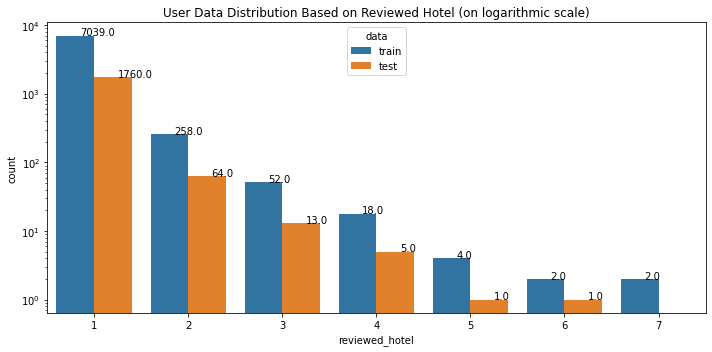

In [236]:
plt.rcParams["figure.figsize"] = [10.00, 5]
plt.rcParams["figure.autolayout"] = True

df_y_train = pd.DataFrame(y_train_user)
df_y_test = pd.DataFrame(y_test_user)

df_y_train['data'] = 'train'
df_y_test['data'] = 'test'

df = df_y_train.append(df_y_test)

ax = sns.countplot(x='reviewed_hotel', data=df, hue='data')
ax.set_yscale('log')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax.set_title('User Data Distribution Based on Reviewed Hotel (on logarithmic scale)')
plt.show()

## Create Train and Test Set For Hotel Data 

In [102]:
df_h = df_hotel_ML.copy()
df_h

,hotel_id,total_review,latitude,longitude,hotel_star_rating,site_review_rating,Beach Hut,BnB,Bungalow,Cottage,Farm Stay,Guest House,Homestay,Hostel,Hotel,Houseboat,Lodge,Motel,Palace,Resort,Service Apartment,Tent,Villa,Bike on Rent,Drivers Rest Room,ATM / Banking,Access Via Exterior Corridors,Adjoining Rooms,Air / Rail Booking,Air-Conditioning - Central,Amphitheatre,Ayurvedic Facilities,Babysitting/ Child Care (surcharge),Badminttion Court,Baggage Room,Ballroom,Banquet Facilities,Bar / Lounge,Barbecue Area,Basketball Court,Beauty Salon - on charge,Billiards,Board Room,Bowling,Business Center,CCTV,Campfire / Bon Fire,Car Rental,Casino,Catering,Cell Phone Rental,Children's Park,City Shuttle Service,Clubhouse,Coffee Shop / Cafe,Computer Rental,Concierge,Conference Facility,Courier Service,Currency Exchange,Disabled Friendly Facilities,Disabled Friendly Rooms,Discotheque,Doctor on Call,Doorman,Dry Cleaning,Electronic / Magnetic Keys,Electronic Check-Out,Exhibit Space,Express Check-In / Check-Out,Express Laundry,Extra Person / Child - Share the same room,Family Room,Fax Machine,Fire Place Available,Fire Safety,First-Aid Kit at Front Desk,Fishing,Fitness Equipment,Floor Butler,Flower Shop,Free Local Calls,Front Desk,Full Time Operation for All 7 Days,Fun Floats,Games Zone,Gardens,Gift Shop,Golf Course,Grocery,Guide / Sightseeing Service,Health Club / Gym Facility Available,Hookah Lounge,In House Events,Internet Access - Surcharge,Jacuzzi,Karaoke,Kids Play Zone,Laundry Service Available,Library,Lift / Elevator,Limousine Service Available,Lobby,Local Tour / Travel Desk,Locker Facility,Major Credit Cards Accepted,Marina On Site,Massage Services,Medical Assistance Available,Metal Detectors,Mini Theatre,Multi Cuisine Restaurant,Multi Lingual Staff,Nature Walk,Night Club,Open Air Restaurant / Dining,Oxygen Cylinder (on request),Paid Transfers,Parking Facility,Party hall,Pest Control Facility,Pets Allowed,"Pick Up and Drop (Rly Station, Bus Stand, Temple)",Picnic Area,Pool Table,Postal / Parcel Services,Power Backup,Private / Plunge Pool,Private Beach,Public Restrooms,RO Water Purification System,Recreation Zone,Restaurant,Rooftop Garden,Sauna,Secretarial Services,Security at All Hotel Entrances,Self Check - In,Separate Sitting Area,Skiing Facility Available,Smoke Detector,Smoking Area,Solarium,Speciality Restaurant,Squash court,Stamps and Mailing Facility,Suites,Swimming Pool,Table Tennis,Taxi Services,Tennis Court,Valet service,Vegetarian Food / Jain Food Available,Veranda,Virtual Golf,Voicemail,Wake-up Call / Service,Water Dispenser Available,Wedding Services Facility,Welcome Drinks,Wheelchair Accessibility - Room,Whirlpool Bath / Shower Cubicle,X-Ray Machine at Entrance,120 AC,220 AC,Air Conditioning,Air Cooler,Alarm Clock,Attached Bathroom,Balcony,Bathrobe,Bathrobes,Bathroom Amenities,Bathtub,Bathtub Only,Bedside Table,Bidet,Blackout Drapes,Breakfast Available,Breakfast chargeable,Ceiling Fan,Centrally Heated,Channel Music,Climate Control,Closet,Clothes Dryer,Clothes Hook in Bathroom,Coffee Table,Complete Bedding,Complimentary Use of Bicycle,Computer,Cribs Available,Crockery / Cutlery,Curtains/Shades,Daily Room Cleaning,Desk,Direct Dial Phone,Disabled Friendly Bathrooms,Do-Not-Disturb Notice,Dressing Area,Dustbins,Ensuite / Private Bathroom,"Extra Bed, Towels, Linens, Bedding (on request)",Extra Toilteries on Demand,Full Kitchen,Gas Cylinder - Chargeable,HD / LCD Satellite TV,Hairdryer,Handicapped Facilities,Hill View from all Rooms,Hot / Cold Running Water,Housekeeping,Ice Bucket on Demand,In-room Storage Space,Induction Plate,International Switch Plugs (on request),Kitchenette,Luggage Rack,Mineral Water,Mini Bar,Mini Refrigerator,Mirror,Modern Toilet Facilities,Movie Channels,Movies &amp; Games on demand,Newspapers,No Smoking Room,Patio - Property,Phone Messaging Services,Pillow menu,Premium Amenities / Toiletries,Premium Beddings / Hypo-Allergenic,Primium Bathrooms,Private Garden,Radio,Reading Lamps,Remote Control TV,Remote Control

In [132]:
print('total unique value dari total_review : ', len(df_h['total_review'].unique()))
arr_total_review = df_h['total_review'].unique()
arr_total_review.sort()
arr_total_review

total unique value dari total_review :  82


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  26,  27,
        28,  29,  30,  32,  33,  34,  35,  36,  37,  38,  40,  41,  43,
        44,  45,  46,  48,  49,  50,  52,  54,  56,  57,  59,  60,  62,
        64,  65,  66,  68,  69,  70,  71,  72,  73,  74,  75,  79,  81,
        85,  89,  90,  96, 100, 104, 106, 111, 119, 122, 125, 132, 135,
       136, 143, 144, 155], dtype=int64)

In [213]:
# change the total_review value into the its rank grouped into group of 2 
# (there is 82 unique item, then the total_review grouped into 41 group)
total_review_dict = pd.DataFrame([np.repeat(np.arange(1, 42), 2),arr_total_review]).T.set_index([1])[0].to_dict()
df_h['total_review'] = df_h['total_review'].apply(lambda x: total_review_dict.get(x))

In [223]:
# split into train and test data from the user data
X = pd.concat([df_h['hotel_id'], df_h.iloc[:, 2:]], axis=1)
y = df_h['total_review']

X_train_hotel, X_test_hotel, y_train_hotel, y_test_hotel = train_test_split(X, y, stratify=y, test_size=0.2)

In [224]:
print('jumlah seluruh  : ', len(df_h))
print('jumlah data train : ', len(X_train_hotel))
print('jumlah data test : ', len(X_test_hotel))

jumlah seluruh  :  1311
jumlah data train :  1048
jumlah data test :  263


In [225]:
# pesebaran data train
y_train_hotel.groupby(by=y_train_hotel.values).count()

1     671
2     145
3      55
4      17
5      14
6      15
7      15
8      10
9       5
10     11
11      3
12      9
13      6
14      6
15      5
16      2
17      5
18      2
19      2
20      2
21      2
22      2
23      3
24      2
25      2
26      2
27      2
28      2
29      3
30      2
31      4
32      2
33      2
34      2
35      3
36      2
37      2
38      2
39      3
40      2
41      2
Name: total_review, dtype: int64

In [226]:
# pesebaran data test
y_test_hotel.groupby(by=y_test_hotel.values).count()

1     168
2      36
3      14
4       5
5       4
6       4
7       4
8       3
9       1
10      3
11      1
12      2
13      2
14      2
15      1
17      1
18      1
19      1
22      1
23      1
24      1
25      1
27      1
29      1
30      1
31      1
35      1
39      1
Name: total_review, dtype: int64

In [227]:
print(X_train_hotel.shape)
print(X_test_hotel.shape)

(1048, 275)
(263, 275)


In [228]:
X_train_hotel.head()

,hotel_id,latitude,longitude,hotel_star_rating,site_review_rating,Beach Hut,BnB,Bungalow,Cottage,Farm Stay,Guest House,Homestay,Hostel,Hotel,Houseboat,Lodge,Motel,Palace,Resort,Service Apartment,Tent,Villa,Bike on Rent,Drivers Rest Room,ATM / Banking,Access Via Exterior Corridors,Adjoining Rooms,Air / Rail Booking,Air-Conditioning - Central,Amphitheatre,Ayurvedic Facilities,Babysitting/ Child Care (surcharge),Badminttion Court,Baggage Room,Ballroom,Banquet Facilities,Bar / Lounge,Barbecue Area,Basketball Court,Beauty Salon - on charge,Billiards,Board Room,Bowling,Business Center,CCTV,Campfire / Bon Fire,Car Rental,Casino,Catering,Cell Phone Rental,Children's Park,City Shuttle Service,Clubhouse,Coffee Shop / Cafe,Computer Rental,Concierge,Conference Facility,Courier Service,Currency Exchange,Disabled Friendly Facilities,Disabled Friendly Rooms,Discotheque,Doctor on Call,Doorman,Dry Cleaning,Electronic / Magnetic Keys,Electronic Check-Out,Exhibit Space,Express Check-In / Check-Out,Express Laundry,Extra Person / Child - Share the same room,Family Room,Fax Machine,Fire Place Available,Fire Safety,First-Aid Kit at Front Desk,Fishing,Fitness Equipment,Floor Butler,Flower Shop,Free Local Calls,Front Desk,Full Time Operation for All 7 Days,Fun Floats,Games Zone,Gardens,Gift Shop,Golf Course,Grocery,Guide / Sightseeing Service,Health Club / Gym Facility Available,Hookah Lounge,In House Events,Internet Access - Surcharge,Jacuzzi,Karaoke,Kids Play Zone,Laundry Service Available,Library,Lift / Elevator,Limousine Service Available,Lobby,Local Tour / Travel Desk,Locker Facility,Major Credit Cards Accepted,Marina On Site,Massage Services,Medical Assistance Available,Metal Detectors,Mini Theatre,Multi Cuisine Restaurant,Multi Lingual Staff,Nature Walk,Night Club,Open Air Restaurant / Dining,Oxygen Cylinder (on request),Paid Transfers,Parking Facility,Party hall,Pest Control Facility,Pets Allowed,"Pick Up and Drop (Rly Station, Bus Stand, Temple)",Picnic Area,Pool Table,Postal / Parcel Services,Power Backup,Private / Plunge Pool,Private Beach,Public Restrooms,RO Water Purification System,Recreation Zone,Restaurant,Rooftop Garden,Sauna,Secretarial Services,Security at All Hotel Entrances,Self Check - In,Separate Sitting Area,Skiing Facility Available,Smoke Detector,Smoking Area,Solarium,Speciality Restaurant,Squash court,Stamps and Mailing Facility,Suites,Swimming Pool,Table Tennis,Taxi Services,Tennis Court,Valet service,Vegetarian Food / Jain Food Available,Veranda,Virtual Golf,Voicemail,Wake-up Call / Service,Water Dispenser Available,Wedding Services Facility,Welcome Drinks,Wheelchair Accessibility - Room,Whirlpool Bath / Shower Cubicle,X-Ray Machine at Entrance,120 AC,220 AC,Air Conditioning,Air Cooler,Alarm Clock,Attached Bathroom,Balcony,Bathrobe,Bathrobes,Bathroom Amenities,Bathtub,Bathtub Only,Bedside Table,Bidet,Blackout Drapes,Breakfast Available,Breakfast chargeable,Ceiling Fan,Centrally Heated,Channel Music,Climate Control,Closet,Clothes Dryer,Clothes Hook in Bathroom,Coffee Table,Complete Bedding,Complimentary Use of Bicycle,Computer,Cribs Available,Crockery / Cutlery,Curtains/Shades,Daily Room Cleaning,Desk,Direct Dial Phone,Disabled Friendly Bathrooms,Do-Not-Disturb Notice,Dressing Area,Dustbins,Ensuite / Private Bathroom,"Extra Bed, Towels, Linens, Bedding (on request)",Extra Toilteries on Demand,Full Kitchen,Gas Cylinder - Chargeable,HD / LCD Satellite TV,Hairdryer,Handicapped Facilities,Hill View from all Rooms,Hot / Cold Running Water,Housekeeping,Ice Bucket on Demand,In-room Storage Space,Induction Plate,International Switch Plugs (on request),Kitchenette,Luggage Rack,Mineral Water,Mini Bar,Mini Refrigerator,Mirror,Modern Toilet Facilities,Movie Channels,Movies &amp; Games on demand,Newspapers,No Smoking Room,Patio - Property,Phone Messaging Services,Pillow menu,Premium Amenities / Toiletries,Premium Beddings / Hypo-Allergenic,Primium Bathrooms,Private Garden,Radio,Reading Lamps,Remote Control TV,Remote Controlled Lights an

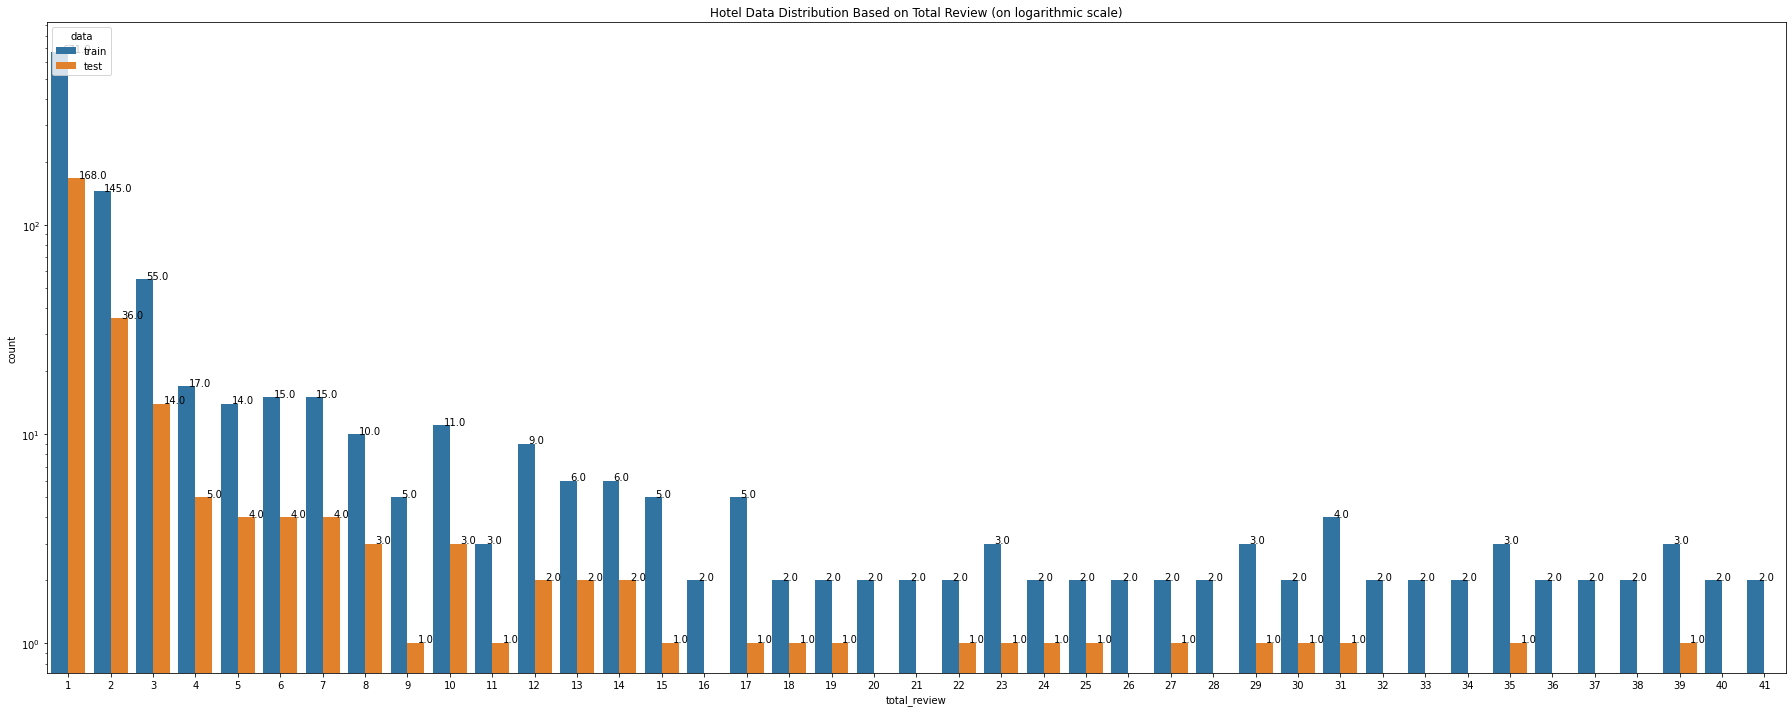

In [235]:
plt.rcParams["figure.figsize"] = [25, 10]
plt.rcParams["figure.autolayout"] = True

df_y_train = pd.DataFrame(y_train_hotel)
df_y_test = pd.DataFrame(y_test_hotel)

df_y_train['data'] = 'train'
df_y_test['data'] = 'test'

df = df_y_train.append(df_y_test)

ax = sns.countplot(x='total_review', data=df, hue='data')
ax.set_yscale('log')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax.set_title('Hotel Data Distribution Based on Total Review (on logarithmic scale)')
plt.show()